# Graph analytics project

## By Vincent Blot & Tanguy Magon

# I. Text mining Part

## Import packages

In [ ]:
import pandas as pd
import os
import unidecode
from nltk.corpus import stopwords
import numpy as np
import re
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import community
import matplotlib
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
#from unidecode import unidecode

In [ ]:
#for installing the pakage that clean the tweets:
#pip install tweet-preprocessor-0.5.0.tar.gz

In [ ]:
import preprocessor as p

In [ ]:
path_name = 'C:/Users/Tanguy Magon/Documents/M2/S2/graph_theory_tweet/datatweet/'

# Importation of the data

In [ ]:
df = pd.DataFrame()
for file in os.listdir('C:/Users/Tanguy Magon/Documents/M2/S2/graph_theory_tweet/datatweet/') :
    print(file)
    temp = pd.read_csv('C:/Users/Tanguy Magon/Documents/M2/S2/graph_theory_tweet/datatweet/'+str(file),sep='\t', quotechar = '"', encoding = 'utf-8', low_memory = False)
    df = pd.concat([df,temp])
df = df.reset_index(drop = True)

Tweet_01_06.txt
Tweet_01_07.txt


C:\anconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


Tweet_01_08.txt
Tweet_01_09.txt
Tweet_01_10.txt
Tweet_01_11.txt
Tweet_01_12.txt
Tweet_01_12_1.txt
Tweet_01_13.txt
Tweet_01_14.txt
Tweet_01_15.txt
Tweet_01_16.txt
Tweet_01_17.txt
Tweet_01_18.txt
Tweet_01_19.txt
Tweet_01_20.txt
Tweet_01_21.txt
Tweet_01_22.txt


In [ ]:
base_etude = df.copy()

Export the data to not have do to the loop each time we want to reload the data:

In [ ]:
base_etude.to_csv('base_étude.csv')

In [ ]:
base_etude = pd.read_csv('base_étude.csv')

C:\anconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (4,5,12,13,18,19,20,21,24,25,37,38,43,44,45,46,49,50,51,52,53,54,55,56,57,58,59,60,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,89,90,91,92,94,97,98,106,124,125,130,131,134,135,136,137,142,143,144,145,150,151,152,153,154,155,156,157,158,159,160,161,162,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,209,210,221,222,223,224,225,226,227,228,229,235,258,268,275,278,282,283,302,303,308,309,315,316,321,322,323,324,327,333,334,341,346,347,348,349,350,353,354,361,367,368,379,380,381,382,383,384,385,386,387,389,390,391,392,393,394,395,396,399,400,401,402,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,430,431,432,433,434,435,436,437,438,439,440,442,443,444,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,468,469,470,471,472,473,474,475,4

# Focus on french tweets

In [ ]:
base_etude.text[2]

"I want to #fondle me? !  I'm there-   https://t.co/0e6nbalAdX https://t.co/i60NgA56f9"

In [ ]:
base_etude_fr = base_etude[base_etude['lang'] == 'fr'].copy()

## Remove URLs from tweets

In [ ]:
def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

In [ ]:
base_etude_fr.text = base_etude_fr.text.apply(lambda x: remove_URL(str(x)))

In [ ]:
#see an exemple of tweet
base_etude_fr.text[0]

'RT @jschlickfisch: #PareBrise #innovationOuverture tactile, pare-brise écran: BFMTV à bord de la voiture du futur#vidéo via @SFRNews'

## Data cleaning function

In [ ]:

def convert_text_to_lowercase(df, colname):
    df[colname] = df[colname].str.lower()
    return df
    
def not_regex(pattern):
        return r"((?!{}).)".format(pattern)

def remove_punctuation(df, colname):
    df[colname] = df[colname].str.replace('\n', ' ')
    df[colname] = df[colname].str.replace('\r', ' ')
    df[colname] = df[colname].apply(lambda x: unidecode.unidecode(x))

    alphanumeric_characters_extended = '(\\b[-/]\\b|[a-zA-Z0-9])'
    df[colname] = df[colname].str.replace(not_regex(alphanumeric_characters_extended), ' ')
    return df

def tokenize_sentence(df, colname):
    df[colname] = df[colname].str.split()
    return df

def remove_stop_words(df, colname):
    stop_words = stopwords.words('french')
    stop_words.remove('pas')
    df[colname] = df[colname].apply(lambda x: [word for word in x if word not in stop_words])
    return df

def reverse_tokenize_sentence(df, colname):
    df[colname] = df[colname].map(lambda word: ' '.join(word))
    return df


def text_cleaning(df, colname):
    """
    Takes in a string of text, then performs the following:
    1. convert text to lowercase
    2. remove punctuation and new line characters '\n'
    3. Tokenize sentences
    4. Remove all stopwords
    5. convert tokenized text to text
    """
    df = (
        df
        .pipe(convert_text_to_lowercase, colname)
        .pipe(remove_punctuation, colname)
        .pipe(tokenize_sentence, colname)
        .pipe(remove_stop_words, colname)
        .pipe(reverse_tokenize_sentence, colname)
    )
    return df

## Applying data cleaning function:

In [ ]:
df_cleaned = text_cleaning(base_etude_fr.copy(), 'text')

In [ ]:
df_cleaned.text[4]

'rt cdiscount rt si tamagotchi'

## Taking just the "sfr" tweets

In [ ]:
df_cleaned_sfr = df_cleaned[df_cleaned['text'].str.contains("sfr")].copy()

In [ ]:
len(df_cleaned_sfr)

29640

In [ ]:
df_cleaned_sfr = df_cleaned_sfr.reset_index(drop = True)

We can visualize tweets with a random n : 

In [ ]:
n = np.random.randint(len(df_cleaned_sfr))
print(df_cleaned_sfr.text[n])

rt sfrnews concours gagnez 2 places concert mae officiel 18/03 gt suivez-nous rt christophemaesfrnews


Reomove rt : 

In [ ]:
df_cleaned_sfr_nort = df_cleaned_sfr[~df_cleaned_sfr['text'].str.startswith('rt')]

In [ ]:
# shape of the data
df_cleaned_sfr_nort.shape

(15835, 597)

In [ ]:
#reset indexes to apply random rows after
df_cleaned_sfr_nort = df_cleaned_sfr_nort.reset_index(drop = True)
n = np.random.randint(len(df_cleaned_sfr_nort))
df_cleaned_sfr_nort.text[n]

## Apply the tweet-preprocesor package:

In [ ]:
df_cleaned_sfr_nort.text = df_cleaned_sfr_nort.text.apply(lambda x: p.clean(str(x)))

In [ ]:
n = np.random.randint(len(df_cleaned_sfr_nort))
df_cleaned_sfr_nort.text[n]

'toutes declarations style olmeta chez sfr autres attendent quoi destituer ccc om'

In [ ]:
#drop duplicates
df_cleaned_sfr_nort.drop_duplicates(subset = ['text'], inplace = True)

In [ ]:
df_cleaned_sfr_nort = df_cleaned_sfr_nort.copy()

## Tokenization

In [ ]:
from nltk.tokenize import punkt

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
tokenizer = nltk.RegexpTokenizer(r'\w+') #create the tokenizer
df_cleaned_sfr_nort['token'] = df_cleaned_sfr_nort.text.apply(tokenizer.tokenize) # apply the tokenizer

## Stemmatization

In [ ]:
stemmer = nltk.stem.SnowballStemmer('french') # french stemmer to apply

def stemmatisation(liste_mots):
    res = liste_mots.copy()
    for i, mot in enumerate(liste_mots):
        res[i] = stemmer.stem(mot)#math word and stemm it 
    return(res)

df_cleaned_sfr_nort['tokens_stemm'] = df_cleaned_sfr_nort['token'].apply(stemmatisation) #apply to token
df_cleaned_sfr_nort['texte_stemm'] = df_cleaned_sfr_nort['tokens_stemm'].apply(lambda x : " ".join(x)) #token to text

## Lemmatisation : 

In [ ]:
import fr_core_news_md

In [ ]:
#!pip install spacy_lefff
import spacy
from spacy_lefff import LefffLemmatizer, POSTagger

nlp = fr_core_news_md.load() #load the french model from spacy
pos = POSTagger()
french_lemmatizer = LefffLemmatizer(after_melt=True, default=True) #initialize the french lemmatizer
nlp.add_pipe(pos, name='pos', after='parser')
nlp.add_pipe(french_lemmatizer, name='lefff', after='pos')
def french_lemma(sentence) :
    doc = nlp(sentence)
    liste = []
    for d in doc:
        liste.append(d._.lefff_lemma) #match words and replace by its lemme word
    return(' '.join(liste))

df_cleaned_sfr_nort['text_lemm'] = df_cleaned_sfr_nort['text'].apply(french_lemma) #apply the the text colonne

2020-03-17 17:33:26,710 - spacy_lefff.downloader - INFO - downloading data for tagger...
2020-03-17 17:33:26,714 - urllib3.connectionpool - DEBUG - Starting new HTTPS connection (1): www.dropbox.com:443
2020-03-17 17:33:27,544 - urllib3.connectionpool - DEBUG - https://www.dropbox.com:443 "GET /s/xjn863wq4599vur/model.tar.gz?dl=1 HTTP/1.1" 301 0
2020-03-17 17:33:27,935 - urllib3.connectionpool - DEBUG - https://www.dropbox.com:443 "GET /s/dl/xjn863wq4599vur/model.tar.gz HTTP/1.1" 302 0
2020-03-17 17:33:27,948 - urllib3.connectionpool - DEBUG - Starting new HTTPS connection (1): ucb99f706a6050956461324a9e98.dl.dropboxusercontent.com:443
2020-03-17 17:33:29,267 - urllib3.connectionpool - DEBUG - https://ucb99f706a6050956461324a9e98.dl.dropboxusercontent.com:443 "GET /cd/0/get/A0Ge0RWZb7uDlJ4cz5MybsAo0hv7HXQ5XnBpaoOta_69SAl1MOB2O01-QavgoMAKn4yzA_r1qDwP6mVexATQOM_0eKfKnN7lcJqcCM7bO9YNdQ/file?dl=1 HTTP/1.1" 200 88861140


 99%|█████████▉| 88.4M/88.9M [00:22<00:00, 3.16MB/s]

2020-03-17 17:33:54,297 - spacy_lefff.downloader - INFO - download complete
2020-03-17 17:33:54,299 - spacy_lefff.melt_tagger - INFO -   TAGGER: Loading lexicon...
2020-03-17 17:33:54,767 - spacy_lefff.melt_tagger - INFO -   TAGGER: Loading tags...
2020-03-17 17:33:54,799 - spacy_lefff.melt_tagger - INFO -   TAGGER: Loading model from C:\anconda3\lib\site-packages\spacy_lefff\data\tagger\models/fr...
2020-03-17 17:33:55,307 - spacy_lefff.melt_tagger - INFO -   TAGGER: Loading model from C:\anconda3\lib\site-packages\spacy_lefff\data\tagger\models/fr: done
2020-03-17 17:33:55,308 - spacy_lefff.lefff - INFO - New LefffLemmatizer instantiated.
2020-03-17 17:33:55,314 - spacy_lefff.lefff - INFO - Reading lefff data...
2020-03-17 17:33:55,897 - spacy_lefff.lefff - INFO - Successfully loaded lefff lemmatizer
2020-03-17 17:33:55,961 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-03-17 17:33:55,991 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-03-17 17:33:5

100%|██████████| 88.9M/88.9M [00:39<00:00, 3.16MB/s]

2020-03-17 17:34:09,305 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-03-17 17:34:09,325 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-03-17 17:34:09,342 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-03-17 17:34:09,368 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-03-17 17:34:09,391 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-03-17 17:34:09,422 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-03-17 17:34:09,451 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-03-17 17:34:09,476 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-03-17 17:34:09,496 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-03-17 17:34:09,515 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-03-17 17:34:09,530 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-03-17 17:34:09,552 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tag

In [ ]:
df_cleaned_sfr_nort.to_csv('clean_data.csv') #save for security

# II. Graph Analytic part 

## TF IDF

In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer

In [ ]:
# Initialize
vectorizer = TfidfVectorizer(analyzer='word', 
                             ngram_range=(1,3), 
                             min_df = 0, 

                             max_features=1000)
# random choice to have a non biased selection
np.random.seed(1)
choice  = np.random.randint(len(df_cleaned_sfr_nort), size=1000)
texte = df_cleaned_sfr_nort.text_lemm.reset_index(drop=True).loc[choice]

tfidf_matrix = vectorizer.fit_transform(texte.tolist()) #tf idf trans

## Graph creation

In [ ]:
from networkx.algorithms import bipartite, community
from scipy import sparse

G = bipartite.matrix.from_biadjacency_matrix(tfidf_matrix)


print("Number of nodes :", len(list(G.nodes(data=True))))
print("Number of edges :", len(list(G.edges(data=True))))


top_nodes = {n for n, d in G.nodes(data=True) if d['bipartite']==0}


Number of nodes : 2000
Number of edges : 9552


# Louvain modularity and partition

In [ ]:
import community
import networkx as nx
import matplotlib.pyplot as plt
partition = community.best_partition(G)
print("Louvain Modularity: ", community.modularity(partition, G))
print("Louvain Partition: ", partition)

Louvain Modularity:  0.49376373906512727
Louvain Partition:  {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 4, 9: 3, 10: 8, 11: 9, 12: 10, 13: 11, 14: 10, 15: 2, 16: 2, 17: 12, 18: 7, 19: 13, 20: 14, 21: 15, 22: 2, 23: 7, 24: 10, 25: 8, 26: 6, 27: 5, 28: 0, 29: 7, 30: 16, 31: 17, 32: 16, 33: 5, 34: 1, 35: 3, 36: 1, 37: 8, 38: 4, 39: 18, 40: 8, 41: 2, 42: 19, 43: 6, 44: 15, 45: 20, 46: 19, 47: 0, 48: 9, 49: 10, 50: 16, 51: 18, 52: 18, 53: 21, 54: 12, 55: 3, 56: 13, 57: 8, 58: 10, 59: 8, 60: 15, 61: 4, 62: 22, 63: 23, 64: 16, 65: 24, 66: 2, 67: 24, 68: 18, 69: 5, 70: 18, 71: 14, 72: 14, 73: 8, 74: 2, 75: 24, 76: 7, 77: 7, 78: 8, 79: 12, 80: 8, 81: 9, 82: 0, 83: 21, 84: 3, 85: 7, 86: 6, 87: 4, 88: 0, 89: 6, 90: 11, 91: 16, 92: 5, 93: 10, 94: 5, 95: 2, 96: 5, 97: 13, 98: 23, 99: 0, 100: 7, 101: 7, 102: 0, 103: 2, 104: 16, 105: 6, 106: 13, 107: 6, 108: 10, 109: 21, 110: 10, 111: 9, 112: 9, 113: 19, 114: 23, 115: 18, 116: 0, 117: 18, 118: 4, 119: 9, 120: 0, 121: 1, 122: 20, 123: 14, 124

# Graph Visualization

C:\anconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


(-1.0799914081149233,
 0.6357288418870023,
 -0.6620011782680284,
 1.022349134569744)

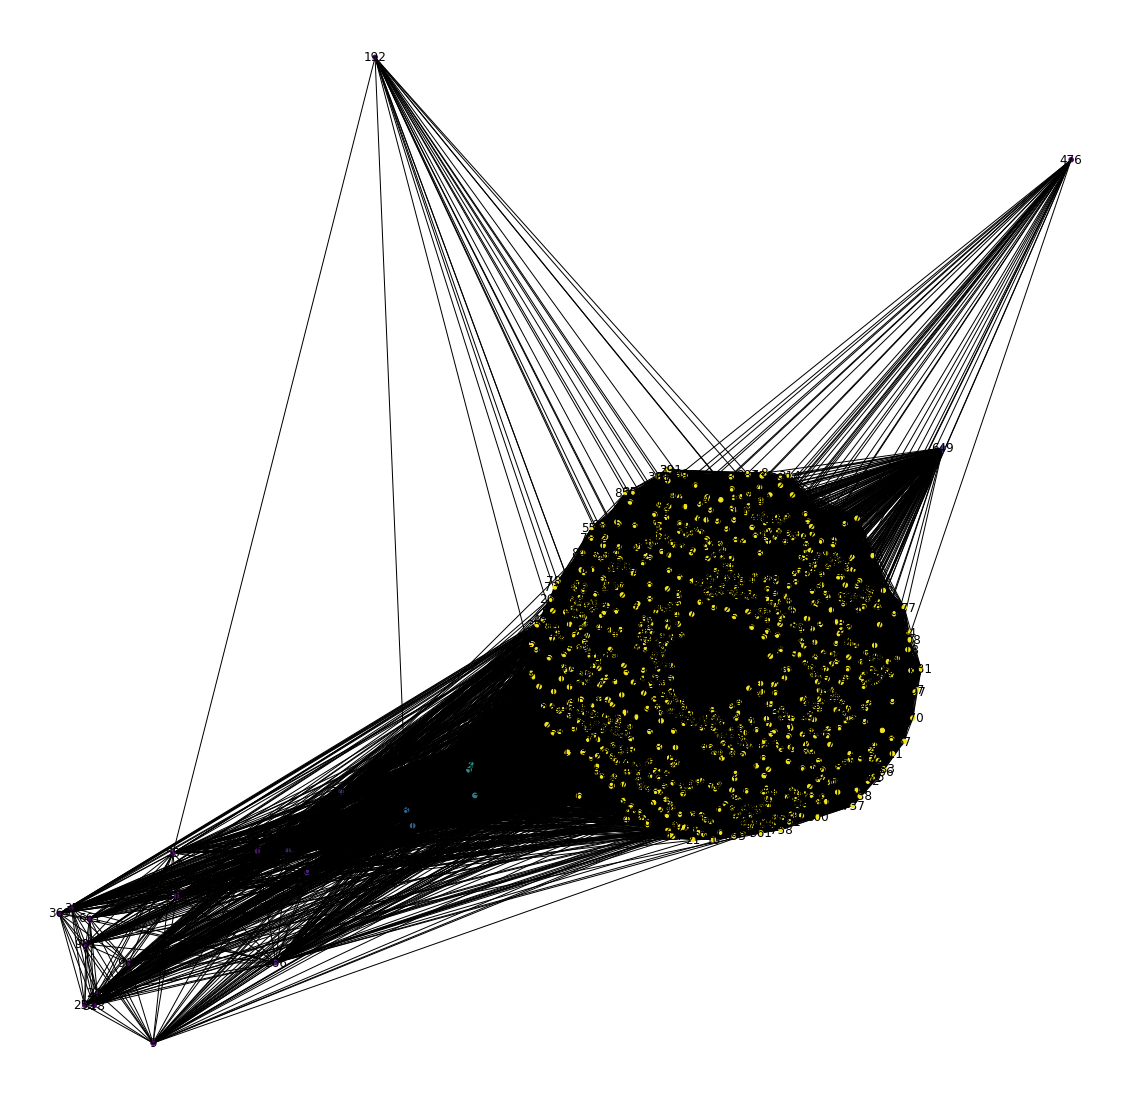

In [ ]:
pos = nx.spring_layout(G_tweets)
bet_cent = nx.betweenness_centrality(G_tweets, normalized=True, endpoints=True) # compute the betweeness centrality 
node_color = [10000 * G_tweets.degree(v) for v in G_tweets] # the color of the nodes is defined by the degreee 
node_size =  [v * 10000 for v in bet_cent.values()] # the size of the nodes is defined by the betweeness centrality
plt.figure(figsize=(20,20)) # we select the figure size
nx.draw_networkx(G_tweets, pos=pos, with_labels=True,  # we draw the graph 
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off') # disable axis for better visualization

In [ ]:
#delete logging error of matplotlib
import logging
logging.getLogger('matplotlib').setLevel(logging.ERROR)
log = logging.getLogger('UNIQUE_NAME_HERE')
log.setLevel(logging.DEBUG)

# Community detection and visualization

Completed Louvain algorithm .. . . 
Modularity:  0.4817712720495464
Total number of Communities= 19


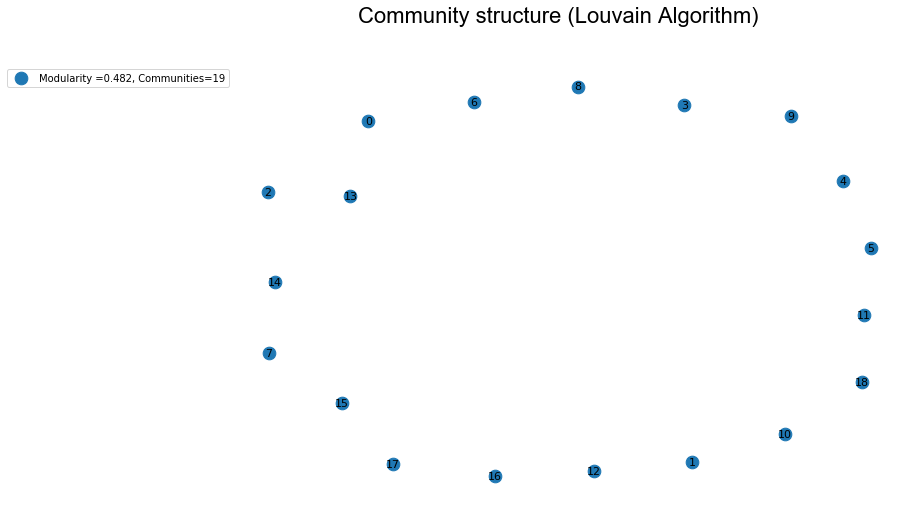

In [ ]:
# Starting with an initial partition of the graph and running the Louvain algorithm for Community Detection
partition=community.best_partition(G, weight='MsgCount')
print('Completed Louvain algorithm .. . . ' )
values=[partition.get(node) for node in G.nodes()]
list_com=partition.values()

# Creating a dictionary like {community_number:tfid_matrix index}
dict_nodes={}

# Populating the dictionary with items
for each_item in partition.items():
    community_num=each_item[1]
    community_node=each_item[0]
    if community_num in dict_nodes:
        value=str(dict_nodes.get(community_num)) + ' | ' + str(community_node)
        dict_nodes.update({community_num:value})
    else:
        dict_nodes.update({community_num:community_node})

# Creating a dataframe from the dict
community_df=pd.DataFrame.from_dict(dict_nodes, orient='index',columns=['Members'])
community_df.index.rename('Community_Num' , inplace=True)


# Creating a new graph to represent the communities created by the Louvain algorithm
matplotlib.rcParams['figure.figsize']= [12, 8]
G_comm=nx.Graph()

# Populating the data from the node dictionary created earlier
G_comm.add_nodes_from(dict_nodes)

# Calculating modularity and the total number of communities
mod=community.modularity(partition,G)
print("Modularity: ", mod)
print("Total number of Communities=", len(G_comm.nodes()))

# Creating the Graph and also calculating Modularity
matplotlib.rcParams['figure.figsize']= [12, 8]
pos_louvain=nx.spring_layout(G_comm)
nx.draw_networkx(G_comm, pos_louvain, with_labels=True,node_size=160,font_size=11,label='Modularity =' + str(round(mod,3)) +
                    ', Communities=' + str(len(G_comm.nodes())))
plt.suptitle('Community structure (Louvain Algorithm)',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('louvain.png',dpi=400, bbox_inches='tight')

# Topic Modelling 

In this section we can build a fonction that will get the words that are in each commnunity.
These words represents the community, and each community a topic.
To get only the words indexes, we had to select the index of the nodes that were superior to 999, because the indexes before 999 are the tweets and not the words. 
Then, we have to match the index with the index of the feature name of the vectorizer to get finally the words that we want.

In [ ]:
def get_subjects(df_community, features_name) :
    
    for i in df_community.index :
        print("Community %d:" % i, end='')
        temp = df_community.Members.loc[i].split(' | ') #list of indexes
        temp = [int(x)  for x in temp if int(x)>999] #taking only indexes superior to 999
        for j in temp :
            print(' %s , ' % features_name[j-1000], end='') #match with features names
        print()

In [ ]:
features_name = vectorizer.get_feature_names() #get feature names from vectorizer

In [ ]:
get_subjects(community_df, features_name) # diplay the topics with the words associated

Community 0: actif ,  aider ,  argent ,  assurer ,  attendre ,  attenter ,  avoir ete ,  avoir plus ,  avoir vous ,  besoin ,  bjr ,  bonjour ,  bonjour aller ,  bonjour aller eviter ,  bonsoir ,  box internet ,  bug ,  ca faire ,  car ,  casser ,  casser couille ,  collegues ,  collegues sfr ,  collegues sfr sav ,  constater ,  contacter ,  couper ,  deja ,  demain aller ,  demenagement ,  depuis hier ,  dernier ,  eme ,  engagement ,  envoye ,  envoye message ,  erreur ,  escroc ,  ete ,  etre ,  facture ,  faire mois ,  fdp ,  fin ,  fixe ,  fois ,  fonctionner ,  fuir ,  generationcable ,  groupe ,  groupe sfr ,  hier ,  honte ,  impossible ,  internet ,  jour ,  jours ,  juste ,  ligner ,  mal ,  matin ,  message ,  minute ,  mois ,  mois attendre ,  mr ,  ni ,  niveau ,  normal ,  nsm ,  oui ,  paye ,  plutot ,  portable ,  pouvoir ,  pris ,  puce ,  question ,  raccrocher ,  reclamer ,  recu ,  remboursement ,  resiliation ,  resilier ,  resolu ,  retrouver ,  sans ,  sans inter

Here this is quite difficult to name a topic, but we can try by for example saying that: \
the community number 5 can be the topic "equiment sfr"\
the community number 16 can be the topic "options sfr"\
the community number 18 can be the topic "insultes/gros mots"\